# Simple Linear Regression
Our goal is create a model to predict the house pricing in King County; to do that, we'll use a dataset which contains house sale prices for King County (houses sold between May 2014 and May 2015) from: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

### Import data set

In [1]:
import pandas as pd

dfHouses = pd.read_csv('../Fundamentals/data/kc_house_data.csv', sep=',')

### Basic EDA and cleaning data

In [2]:
dfHouses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# Just use python variable replacement syntax to make the text dynamic.
from IPython.display import Markdown as md

md(f"The KC houses data set consists of {dfHouses.shape[1]} different parameters for {dfHouses.shape[0]} samples.")

The KC houses data set consists of 21 different parameters for 21613 samples.

Type data and memory usage

In [4]:
dfHouses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

One object type and the rest of data is numerical.

Now we write down some notes about what the colums mean:

- id: self explanatory
- date: the date house was sold
- price: our target
- bedrooms: self explanatory
- bathrooms: self explanatory
- sqft_living: square footage of the home
- sqft_lot: square footage of the lot
- floors: Total levels in house
- waterfront: Does the house have waterfront?
- view: Has the house been viewed?
- condition: How good the condition is
- grade: overall grade given to the housing unit, based on King County grading system
- sqft_above: square footage of house apart from basement
- sqft_basement: square footage of the basement
- yr_built: self explanatory
- yr_renovated: self explanatory
- zipcode: self explanatory
- lat: Latitude
- long: Longitude
- sqft_living15: The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15: The square footage of the land lots of the nearest 15 neighbors

The next step is searching for missing, NA and null values.

In [5]:
(dfHouses.isnull() | dfHouses.empty | dfHouses.isna()).sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

We've found missing data about sqft_above (fortunately only two NaN!).
Let's see what they are and then replace them with mean.

In [6]:
dfHouses[dfHouses.isna().any(axis=1)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10,1736800520,20150403T000000,662500.0,3,2.5,3560,9796,1.0,0,0,...,8,NaN,1700,1965,0,98007,47.6007,-122.145,2210,8925
17,6865200140,20140529T000000,485000.0,4,1.0,1600,4300,1.5,0,0,...,7,NaN,0,1916,0,98103,47.6648,-122.343,1610,4300


In [7]:
dfHouses["sqft_above"] = dfHouses["sqft_above"].fillna(dfHouses["sqft_above"].mean())

In [8]:
nr = dfHouses["sqft_above"].isna().sum()
print(f"Now we have {nr} missing values on sqft_above column!")

Now we have 0 missing values on sqft_above column!


Some other checks.

In [9]:
dfHouses.max()

id                    9900000190
date             20150527T000000
price                    7.7e+06
bedrooms                      33
bathrooms                      8
sqft_living                13540
sqft_lot                 1651359
floors                       3.5
waterfront                     1
view                           4
condition                      5
grade                         13
sqft_above                  9410
sqft_basement               4820
yr_built                    2015
yr_renovated                2015
zipcode                    98199
lat                      47.7776
long                    -121.315
sqft_living15               6210
sqft_lot15                871200
dtype: object

We notice that:
- date has ISO 8601 format;
- price has a scientific notation "7.7e+06".

It would be convenient reformat date in pandas datetime object and price in float format.

In [10]:
dfHouses['date'] = pd.to_datetime(dfHouses['date'],infer_datetime_format=True)
# about all numeric values (price included)
pd.options.display.float_format = '{:.2f}'.format

A quick check on date format...

In [11]:
pr = dfHouses["date"].max()
print(f"Now 20150527T000000 has become {pr}")

Now 20150527T000000 has become 2015-05-27 00:00:00


... and price format.

In [12]:
pr = dfHouses["price"].max()
print(f"Now 7.7e+06 has become {pr}")

Now 7.7e+06 has become 7700000.0


At this point we can elaborate some descriptions of the data.

In [13]:
dfHouses.sort_index(axis=1, ascending=True).describe().T

,count,mean,std,min,25%,50%,75%,max
bathrooms,21613.00,2.11,0.77,0.00,1.75,2.25,2.50,8.00
bedrooms,21613.00,3.37,0.93,0.00,3.00,3.00,4.00,33.00
condition,21613.00,3.41,0.65,1.00,3.00,3.00,4.00,5.00
floors,21613.00,1.49,0.54,1.00,1.00,1.50,2.00,3.50
grade,21613.00,7.66,1.18,1.00,7.00,7.00,8.00,13.00
id,21613.00,4580301520.86,2876565571.31,1000102.00,2123049194.00,3904930410.00,7308900445.00,9900000190.00
lat,21613.00,47.56,0.14,47.16,47.47,47.57,47.68,47.78
long,21613.00,-122.21,0.14,-122.52,-122.33,-122.23,-122.12,-121.31
price,21613.00,540088.14,367127.20,75000.00,321950.00,450000.00,645000.00,7700000.00
sqft_above,21613.00,1788.40,828.09,290.00,1190.00,1560.00,2210.00,9410.00


### Checking the correlation between attributes

In [14]:
dfHouses["price"].describe()

count     21613.00
mean     540088.14
std      367127.20
min       75000.00
25%      321950.00
50%      450000.00
75%      645000.00
max     7700000.00
Name: price, dtype: float64

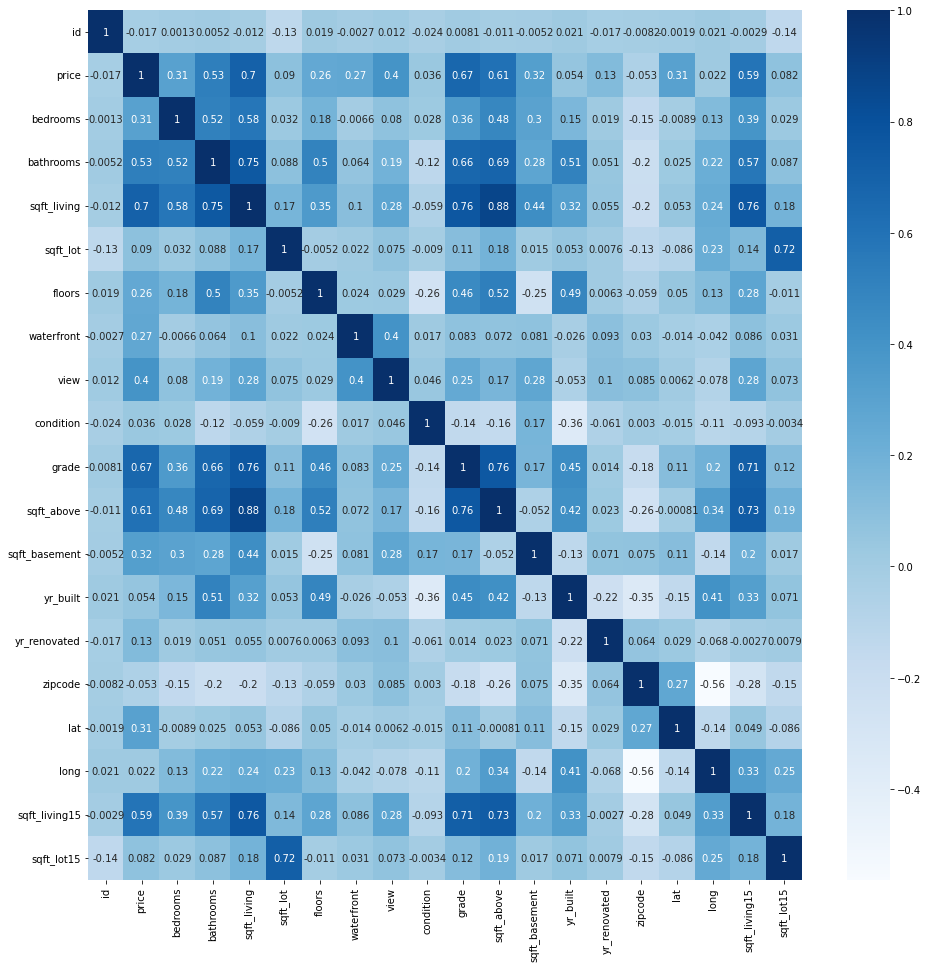

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

corrMatrix = dfHouses.corr(method='pearson')
plt.figure(figsize=(16, 16))
sns.heatmap(corrMatrix, cmap="Blues", annot=True)
plt.show()

So many numbers! But we're interested on large correlation numbers; and for "large" we mean greater than or equal to 0.75.

In [16]:
s = corrMatrix.unstack()
so = s.where((s >= 0.75) & (s < 1)).dropna().sort_values(kind="quicksort", ascending=False)
so

sqft_above     sqft_living     0.88
sqft_living    sqft_above      0.88
grade          sqft_living     0.76
sqft_living    grade           0.76
sqft_living15  sqft_living     0.76
sqft_living    sqft_living15   0.76
sqft_above     grade           0.76
grade          sqft_above      0.76
sqft_living    bathrooms       0.75
bathrooms      sqft_living     0.75
dtype: float64

OK, but what happens between them and the price?

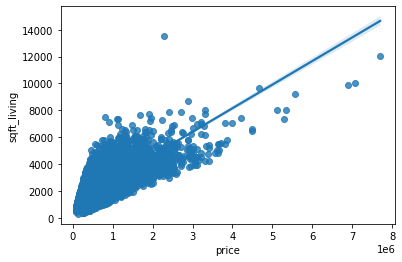

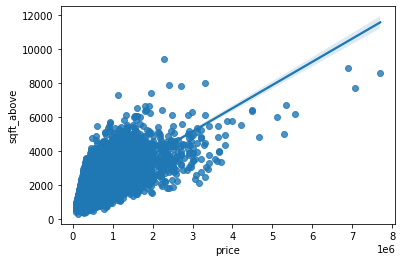

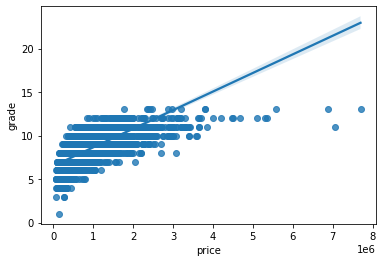

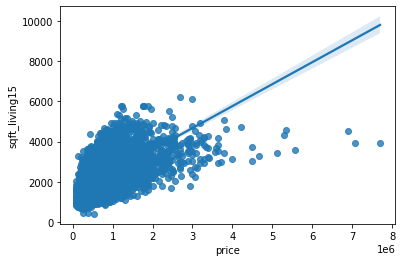

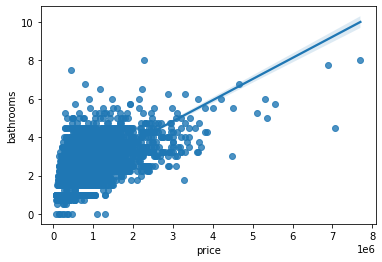

In [17]:
cols_names = ["sqft_living", "sqft_above", "grade", "sqft_living15", "bathrooms"]
for name in cols_names:
    sns.regplot(x=dfHouses["price"], y=dfHouses[name])
    plt.show()


### Train and test the model

Split data in train and test parts.

In [18]:
dfHouses['date'] = dfHouses['date'].apply(lambda x: x.toordinal())

In [19]:
from sklearn.model_selection import train_test_split

X = dfHouses.drop('price', axis=1)
y = dfHouses['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)
y_predict = model.predict(X_test)

scoreTrain = model.score(X_train, y_train)
scoreTest = model.score(X_test, y_test) 

print(f"Train accuracy {round(scoreTrain * 100,0)} %")
print(f"Test accuracy {round(scoreTest* 100,0)} %")


Train accuracy 70.0 %
Test accuracy 71.0 %


We can improve the model performance by using the "Polynomial Features", that are a type of feature engineering where we raise existing features to an exponent in order to increases the capacity/complexity of the model.
The “degree” of the polynnnomial is used to control the number of features added: ex. 3 --> add two new variables for each input variable (typically a small degree is used such as 2 or 3 because of greater values also increases complexity).

In [22]:
from sklearn.preprocessing import PolynomialFeatures

degree = 2
poly = PolynomialFeatures(degree, include_bias=False)

X_poly = poly.fit_transform(X)
y_poly = y

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y_poly, random_state=12)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train_poly)
y_predict_poly = model_poly.predict(X_test_poly)

score_poly_Train = model_poly.score(X_train_poly, y_train_poly)
score_poly_Test = model_poly.score(X_test_poly, y_test_poly) 


print(f"Train accuracy {round(score_poly_Train * 100,0)} %")
print(f"Test accuracy {round(score_poly_Test * 100,0)} %")


Train accuracy 75.0 %
Test accuracy 77.0 %


In [23]:
y_test_poly

array([ 286437.84287802,  150217.67921718,  300618.8644215 , ...,
       1613285.47693206,  629127.25004601,  292144.97319891])

In [33]:
y_test_poly[0]

221900.0

In [37]:
sublesson = pd.DataFrame()
sublesson["id"] = y_test_poly.index
sublesson["price"] = y_predict_poly
sublesson

,id,price
0,2019,286437.84
1,3435,150217.68
2,15940,300618.86
3,9811,689280.69
4,18665,447547.50
...,...,...
5399,17756,1444787.70
5400,15053,258028.88
5401,17838,1613285.48
5402,12691,629127.25
